# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import matplotlib.dates as mdate

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | punta arenas.
Processing Record 1  of Set 1 | upernavik.
Processing Record 2  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 3  of Set 1 | lipari.
Processing Record 4  of Set 1 | saskylakh.
Processing Record 5  of Set 1 | upington.
Processing Record 6  of Set 1 | kirakira.
Processing Record 7  of Set 1 | ribeira grande.
Processing Record 8  of Set 1 | pevek.
Processing Record 9  of Set 1 | hermanus.
Processing Record 10  of Set 1 | vaini.
Processing Record 11  of Set 1 | hilo.
Processing Record 12  of Set 1 | uetze.
Processing Record 13  of Set 1 | lata.
Processing Record 14  of Set 1 | cape town.
Processing Record 15  of Set 1 | umzimvubu.
City not found...skipping umzimvubu.
Processing Record 16  of Set 1 | ushuaia.
Processing Record 17  of Set 1 | pinawa.
Processing Record 18  of Set 1 | vestmannaeyjar.
Processing Record 19  of Set 1 | ihosy.
Processing Record 20  of 

Processing Record 26  of Set 4 | port alfred.
Processing Record 27  of Set 4 | henzada.
City not found...skipping henzada.
Processing Record 28  of Set 4 | maryborough.
Processing Record 29  of Set 4 | lorengau.
Processing Record 30  of Set 4 | quatre cocos.
Processing Record 31  of Set 4 | san patricio.
Processing Record 32  of Set 4 | chapeltique.
Processing Record 33  of Set 4 | korla.
Processing Record 34  of Set 4 | coquimbo.
Processing Record 35  of Set 4 | petropavlovsk-kamchatskiy.
Processing Record 36  of Set 4 | pringsewu.
Processing Record 37  of Set 4 | znamenskoye.
Processing Record 38  of Set 4 | maningrida.
Processing Record 39  of Set 4 | dolores.
Processing Record 40  of Set 4 | pisco.
Processing Record 41  of Set 4 | new norfolk.
Processing Record 42  of Set 4 | san cristobal.
Processing Record 43  of Set 4 | bodden town.
Processing Record 44  of Set 4 | batticaloa.
Processing Record 45  of Set 4 | koutiala.
Processing Record 46  of Set 4 | meyungs.
City not found...s

Processing Record 3  of Set 8 | neustadt.
Processing Record 4  of Set 8 | ahipara.
Processing Record 5  of Set 8 | malgrat de mar.
Processing Record 6  of Set 8 | lucapa.
Processing Record 7  of Set 8 | gunjur.
Processing Record 8  of Set 8 | talara.
Processing Record 9  of Set 8 | ampanihy.
Processing Record 10  of Set 8 | methven.
Processing Record 11  of Set 8 | taloqan.
Processing Record 12  of Set 8 | marsa matruh.
Processing Record 13  of Set 8 | casablanca.
Processing Record 14  of Set 8 | minab.
Processing Record 15  of Set 8 | catabola.
Processing Record 16  of Set 8 | basse.
Processing Record 17  of Set 8 | usinsk.
Processing Record 18  of Set 8 | dunedin.
Processing Record 19  of Set 8 | camana.
Processing Record 20  of Set 8 | matveyevka.
Processing Record 21  of Set 8 | dabhol.
Processing Record 22  of Set 8 | farafangana.
Processing Record 23  of Set 8 | gelsenkirchen.
Processing Record 24  of Set 8 | pizarro.
Processing Record 25  of Set 8 | zima.
Processing Record 26  o

Processing Record 34  of Set 11 | san luis.
Processing Record 35  of Set 11 | anadyr.
Processing Record 36  of Set 11 | tura.
Processing Record 37  of Set 11 | barra do corda.
Processing Record 38  of Set 11 | lumberton.
Processing Record 39  of Set 11 | nizhneyansk.
City not found...skipping nizhneyansk.
Processing Record 40  of Set 11 | goderich.
Processing Record 41  of Set 11 | phangnga.
Processing Record 42  of Set 11 | madras.
Processing Record 43  of Set 11 | dzhusaly.
City not found...skipping dzhusaly.
Processing Record 44  of Set 11 | kozhva.
Processing Record 45  of Set 11 | laguna.
Processing Record 46  of Set 11 | praia da vitoria.
Processing Record 47  of Set 11 | te anau.
Processing Record 48  of Set 11 | lao cai.
Processing Record 49  of Set 11 | sorong.
Processing Record 0  of Set 12 | taraza.
Processing Record 1  of Set 12 | buariki.
City not found...skipping buariki.
Processing Record 2  of Set 12 | gizo.
Processing Record 3  of Set 12 | jiwani.
Processing Record 4  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Data Count
weather_df.count()

City                645
Country             645
Date                645
Latitude            645
Longitude           645
Cloudiness (%)      645
Humidity (%)        645
Max Temp (F)        645
Wind Speed (mph)    645
dtype: int64

In [5]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,punta arenas,CL,2022-09-13 16:38:10,-53.15,-70.9167,0,86,30.578,2.06
1,upernavik,GL,2022-09-13 16:38:10,72.7868,-56.1549,100,97,40.352,2.18
2,taolanaro,,,,,,,,
3,lipari,IT,2022-09-13 16:38:10,38.4674,14.954,1,59,77.594,0.04
4,saskylakh,RU,2022-09-13 16:38:11,71.9167,114.0833,100,97,35.744,1.71


In [6]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


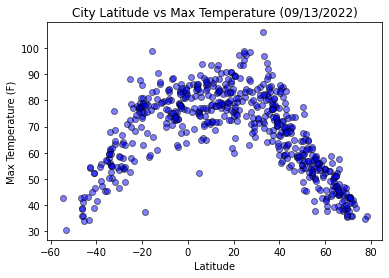

In [7]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

#Save the figure
plt.savefig("Latitudevs.TemperaturePlot.png")


## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


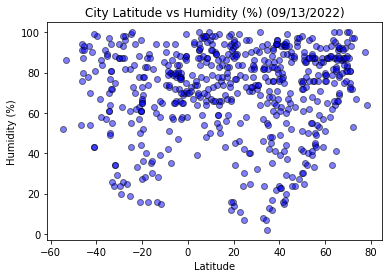

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

#Save the figure
plt.savefig("Latitudevs.HumidityPlot.png")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


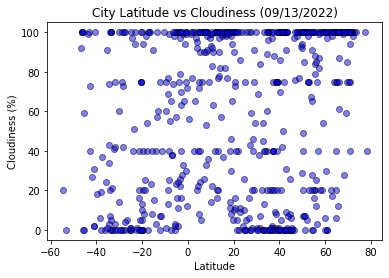

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

#Save the figure
plt.savefig("Latitudevs.CloudinessPlot.png")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


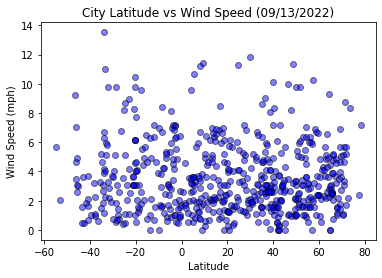

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

#Save the figure
plt.savefig("Latitudevs.WindSpeedPlot.png")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.64x + 91.99
The r-squared is: -0.8209918071701939
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


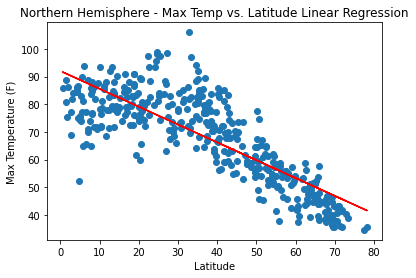

In [13]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
#Save the figure
plt.savefig("NorthernHemisphere-MaxTempvs.LatitudeLinearRegression.png")

plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.83x + 84.84
The r-squared is: 0.7925893896190985
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


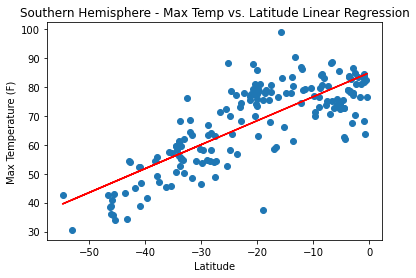

In [14]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
#Save the figure
plt.savefig("SouthernHemisphere-MaxTempvs.LatitudeLinearRegression.png")

plt.show()



### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 71.2
The r-squared is: 0.01652717949935848
The regression does not display much of a correlation between the data sets.


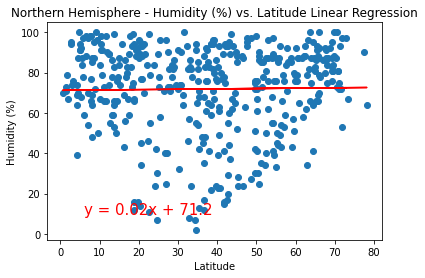

In [15]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 

#Save the figure
plt.savefig("NorthernHemisphere-Humidity(%)vs.LatitudeLinearRegression.png")

plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 68.24
The r-squared is: -0.01112391111552849
The regression does not display much of a correlation between the data sets.


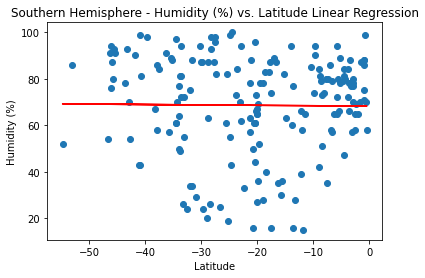

In [16]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

#Save the figure
plt.savefig("SouthernHemisphere-Humidity(%)vs.LatitudeLinearRegression.png")

plt.show()



### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.13x + 57.98
The r-squared is: 0.06910854461007616
The regression does not display much of a correlation between the data sets.


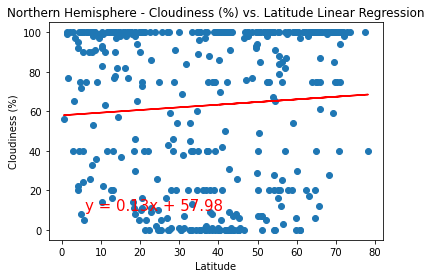

In [17]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

#Save the figure
plt.savefig("NorthernHemisphere-Cloudiness(%)vs.LatitudeLinearRegression.png")

plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.4x + 54.15
The r-squared is: 0.14189625070338288
The regression does not display much of a correlation between the data sets.


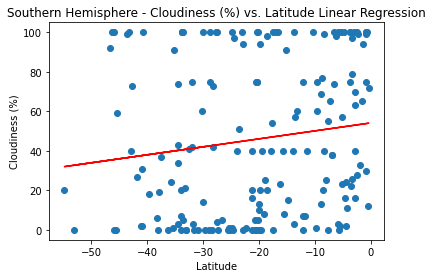

In [18]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

#Save the figure
plt.savefig("SouthernHemisphere-Cloudiness(%)vs.LatitudeLinearRegression.png")

plt.show()



### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 3.28
The r-squared is: 0.029921088681490036
The regression does not display much of a correlation between the data sets.


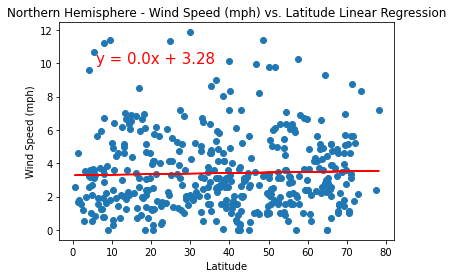

In [19]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

#Save the figure
plt.savefig("NorthernHemisphere-WindSpeed(mph)vs.LatitudeLinearRegression.png")

plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.0x + 3.73
The r-squared is: -0.00037254639694605493
The regression does not display much of a correlation between the data sets.


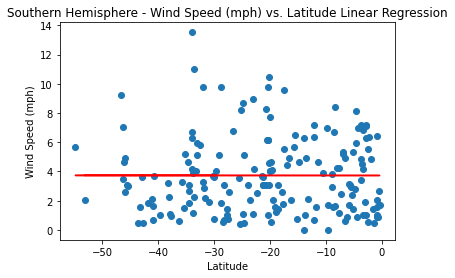

In [20]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")

#Save the figure
plt.savefig("SouthernHemisphere-WindSpeed(mph)vs.LatitudeLinearRegression.png")

plt.show()

